In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Read from csv data source
df_customer = pd.read_csv('customer-data.csv')

In [85]:
df_customer

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


In [86]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [87]:
df_customer['outcome'] = df_customer['outcome'].astype(int)

In [88]:
print(df_customer['outcome'].value_counts())

outcome
0    6867
1    3133
Name: count, dtype: int64


In [89]:
df_customer.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [90]:
# Daftar fitur numerik yang ingin dianalisis
num_cols = ['credit_score', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents']

# Loop untuk menghitung dan mencetak rata-rata per grup
for col in num_cols:
    mean_outcome = df_customer.groupby('outcome')[col].mean()
    print(f"\nRata-rata {col}:")
    print(f'{mean_outcome}')



Rata-rata credit_score:
outcome
0    0.546092
1    0.449571
Name: credit_score, dtype: float64

Rata-rata annual_mileage:
outcome
0    11342.852559
1    12482.562278
Name: annual_mileage, dtype: float64

Rata-rata speeding_violations:
outcome
0    1.924858
1    0.514204
Name: speeding_violations, dtype: float64

Rata-rata DUIs:
outcome
0    0.310179
1    0.083626
Name: DUIs, dtype: float64

Rata-rata past_accidents:
outcome
0    1.403961
1    0.294287
Name: past_accidents, dtype: float64


In [91]:
df_customer[behavior_cols].describe()

,speeding_violations,DUIs,past_accidents
count,10000.000000,10000.00000,10000.000000
mean,1.482900,0.23920,1.056300
std,2.241966,0.55499,1.652454
min,0.000000,0.00000,0.000000
25%,0.000000,0.00000,0.000000
50%,0.000000,0.00000,0.000000
75%,2.000000,0.00000,2.000000
max,22.000000,6.00000,15.000000


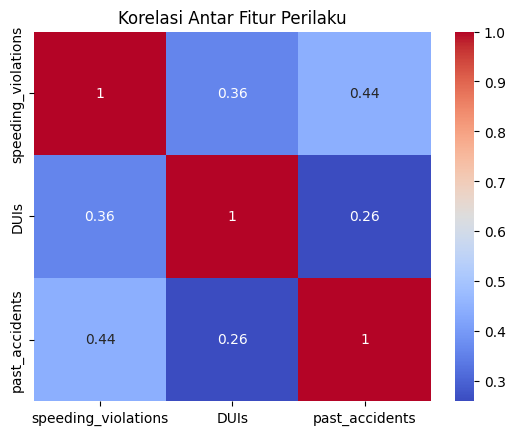

In [92]:
# Subset hanya fitur perilaku
behavior_cols = ['speeding_violations', 'DUIs', 'past_accidents']

# Hitung korelasi antar fitur
corr_matrix = df_customer[behavior_cols].corr()

# Visualisasikan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Perilaku")
plt.show()


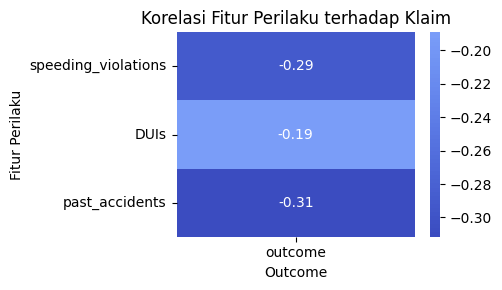

In [138]:
# Ambil subset korelasi
corr_to_outcome = df_customer[behavior_cols + ['outcome']].corr()
corr_subset = corr_to_outcome[['outcome']].drop('outcome')  # hanya fitur ke outcome

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Korelasi Fitur Perilaku terhadap Klaim')
plt.ylabel('Fitur Perilaku')
plt.xlabel('Outcome')
plt.tight_layout()
plt.show()

In [94]:
corrs = df_customer[['DUIs', 'speeding_violations', 'past_accidents', 'outcome']].corr()['outcome'].abs()
corrs = corrs.drop('outcome')
print(corrs)


DUIs                   0.189352
speeding_violations    0.291862
past_accidents         0.311495
Name: outcome, dtype: float64


In [95]:
weights = corrs / corrs.sum()
print(weights)

DUIs                   0.238867
speeding_violations    0.368183
past_accidents         0.392950
Name: outcome, dtype: float64


In [96]:
df_customer['risk_behavior_score'] = (
    df_customer['DUIs'] * weights['DUIs'] +
    df_customer['speeding_violations'] * weights['speeding_violations'] +
    df_customer['past_accidents'] * weights['past_accidents']
)


In [97]:
df_customer

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,risk_behavior_score
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,0,0.000000
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,1,0.000000
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,0,0.000000
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,0,0.000000
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,1,1.129315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,0,0.392950
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,0,0.368183
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,0,0.000000
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,1,1.129315


In [98]:
df_customer['risk_behavior_score'].describe()

count    10000.000000
mean         1.018188
std          1.311089
min          0.000000
25%          0.000000
50%          0.477734
75%          1.547034
max         10.457717
Name: risk_behavior_score, dtype: float64

In [99]:
correlation = df_customer[['risk_behavior_score', 'outcome']].corr().iloc[0, 1]
print(f'Korelasi antara risk_behavior_score dan outcome: {correlation:.4f}')

Korelasi antara risk_behavior_score dan outcome: -0.3572


In [123]:
df_customer[df_customer['risk_behavior_score'] > 0]['outcome'].value_counts()

outcome
0    5126
1     819
Name: count, dtype: int64

In [112]:
pd.crosstab(df_customer['outcome'], df_customer['risk_behavior_score'] > 0, normalize='index')


risk_behavior_score,False,True
outcome,,
0,0.253531,0.746469
1,0.738589,0.261411


In [144]:
df_customer.groupby('outcome')['risk_behavior_score'].mean()

outcome
0    1.334478
1    0.324936
Name: risk_behavior_score, dtype: float64

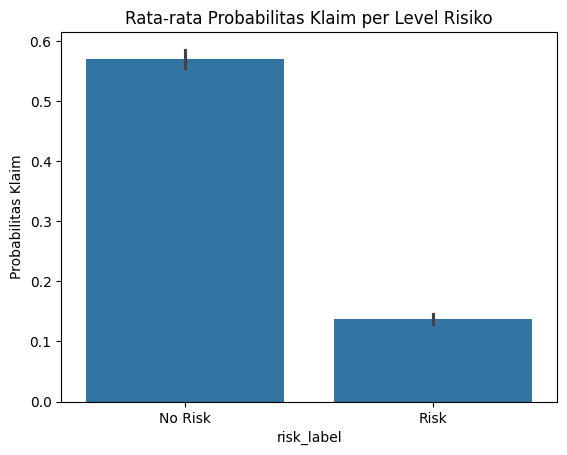

In [155]:
# Gunakan risk_label: 'Risk' vs 'No Risk'
sns.barplot(
    x='risk_label', y='outcome', data=df_customer
)
plt.title('Rata-rata Probabilitas Klaim per Level Risiko')
plt.ylabel('Probabilitas Klaim')
plt.show()


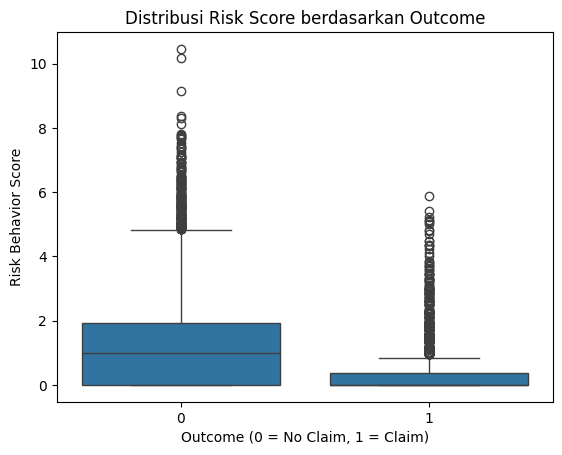

In [154]:
sns.boxplot(x='outcome', y='risk_behavior_score', data=df_customer)
plt.title('Distribusi Risk Score berdasarkan Outcome')
plt.xlabel('Outcome (0 = No Claim, 1 = Claim)')
plt.ylabel('Risk Behavior Score')
plt.show()


### Driving Experience vs Risk Behaviour Score

In [118]:
pd.crosstab(
    [df_customer['driving_experience'], (df_customer['risk_behavior_score'] == 0).replace({True: 'No Risk', False: 'Risk'})],
    df_customer['outcome'],
    normalize='index'
)


outcome                                        0         1
driving_experience risk_behavior_score                    
0-9y               No Risk              0.371955  0.628045
10-19y             No Risk              0.793407  0.206593
                   Risk                 0.756329  0.243671
20-29y             No Risk              0.967213  0.032787
                   Risk                 0.948008  0.051992
30y+               No Risk              0.888889  0.111111
                   Risk                 0.981783  0.018217

In [116]:
# Filter hanya klaim
df_klaim = df_customer[df_customer['outcome'] == 1].copy()

# Tambahkan kolom label Risk
df_klaim['risk_label'] = df_klaim['risk_behavior_score'].eq(0).replace({True: 'No Risk', False: 'Risk'})

# Crosstab proporsi Risk vs No Risk untuk setiap driving_experience
pd.crosstab(
    df_klaim['driving_experience'],
    df_klaim['risk_label'],
    normalize='index'
)


risk_label,No Risk,Risk
driving_experience,,
0-9y,1.000000,0.000000
10-19y,0.119441,0.880559
20-29y,0.018349,0.981651
30y+,0.050000,0.950000


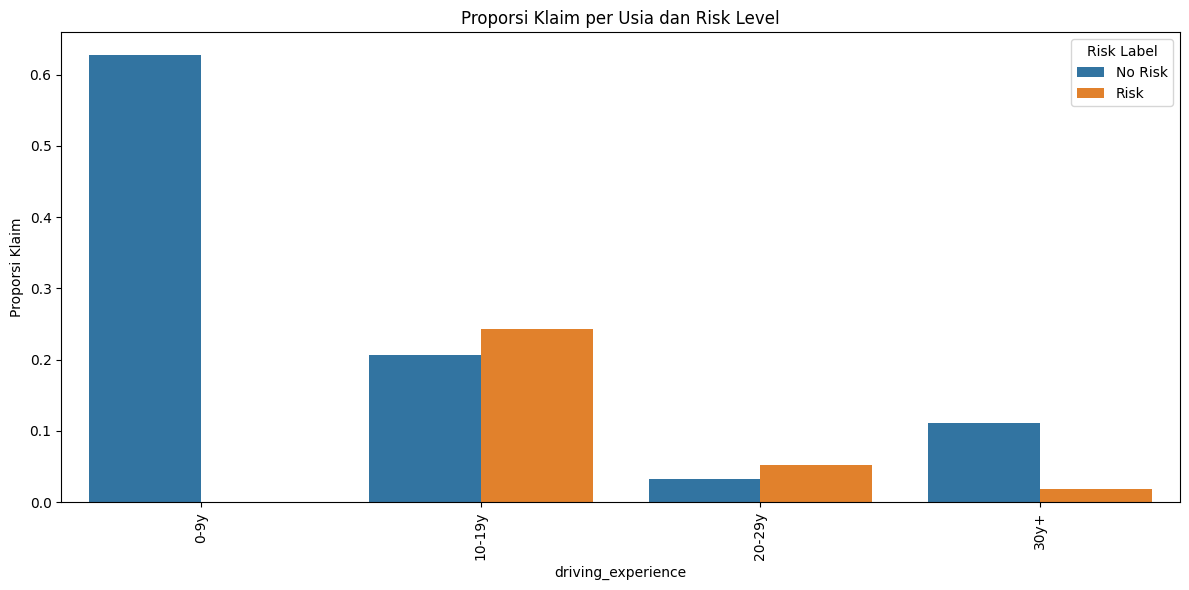

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tambah kolom label risiko
df_customer['risk_label'] = df_customer['risk_behavior_score'].eq(0).replace({True: 'No Risk', False: 'Risk'})

# Crosstab untuk proporsi
ct = pd.crosstab(
    [df_customer['driving_experience'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='index'
).reset_index()

# Rename kolom agar mudah dibaca
ct.columns.name = None
ct = ct.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct, x='driving_experience', y='Claim', hue='risk_label'
)
plt.title('Proporsi Klaim per Usia dan Risk Level')
plt.ylabel('Proporsi Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


### Age vs Risk Behaviour Score

In [119]:
pd.crosstab(
    [df_customer['age'], (df_customer['risk_behavior_score'] == 0).replace({True: 'No Risk', False: 'Risk'})],
    df_customer['outcome'],
    normalize='index'
)


outcome                           0         1
age   risk_behavior_score                    
16-25 No Risk              0.281746  0.718254
26-39 No Risk              0.535961  0.464039
      Risk                 0.726074  0.273926
40-64 No Risk              0.578313  0.421687
      Risk                 0.921923  0.078077
65+   No Risk              0.680556  0.319444
      Risk                 0.950307  0.049693

In [121]:
# Filter hanya klaim
df_klaim = df_customer[df_customer['outcome'] == 1].copy()

# Tambahkan kolom label Risk
df_klaim['risk_label'] = df_klaim['risk_behavior_score'].eq(0).replace({True: 'No Risk', False: 'Risk'})

# Crosstab proporsi Risk vs No Risk untuk setiap driving_experience
pd.crosstab(
    df_klaim['age'],
    df_klaim['risk_label'],
    normalize='index'
)


risk_label,No Risk,Risk
age,,
16-25,1.000000,0.000000
26-39,0.456395,0.543605
40-64,0.612691,0.387309
65+,0.586735,0.413265


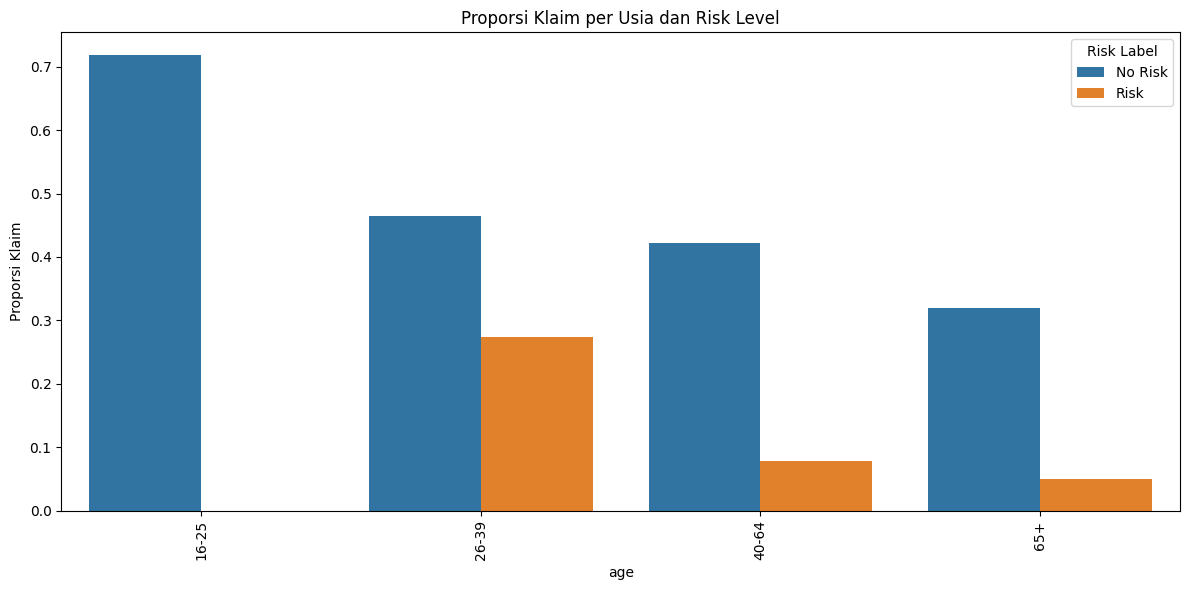

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tambah kolom label risiko
df_customer['risk_label'] = df_customer['risk_behavior_score'].eq(0).replace({True: 'No Risk', False: 'Risk'})

# Crosstab untuk proporsi
ct = pd.crosstab(
    [df_customer['age'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='index'
).reset_index()

# Rename kolom agar mudah dibaca
ct.columns.name = None
ct = ct.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct, x='age', y='Claim', hue='risk_label'
)
plt.title('Proporsi Klaim per Usia dan Risk Level')
plt.ylabel('Proporsi Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


### RACE vs Risk Behaviour Score

In [120]:
pd.crosstab(
    [df_customer['race'], (df_customer['risk_behavior_score'] == 0).replace({True: 'No Risk', False: 'Risk'})],
    df_customer['outcome'],
    normalize='index'
)


outcome                              0         1
race     risk_behavior_score                    
majority No Risk              0.430418  0.569582
         Risk                 0.862165  0.137835
minority No Risk              0.420048  0.579952
         Risk                 0.862917  0.137083

In [122]:
# Filter hanya klaim
df_klaim = df_customer[df_customer['outcome'] == 1].copy()

# Tambahkan kolom label Risk
df_klaim['risk_label'] = df_klaim['risk_behavior_score'].eq(0).replace({True: 'No Risk', False: 'Risk'})

# Crosstab proporsi Risk vs No Risk untuk setiap driving_experience
pd.crosstab(
    df_klaim['race'],
    df_klaim['risk_label'],
    normalize='index'
)


risk_label,No Risk,Risk
race,,
majority,0.736486,0.263514
minority,0.757009,0.242991


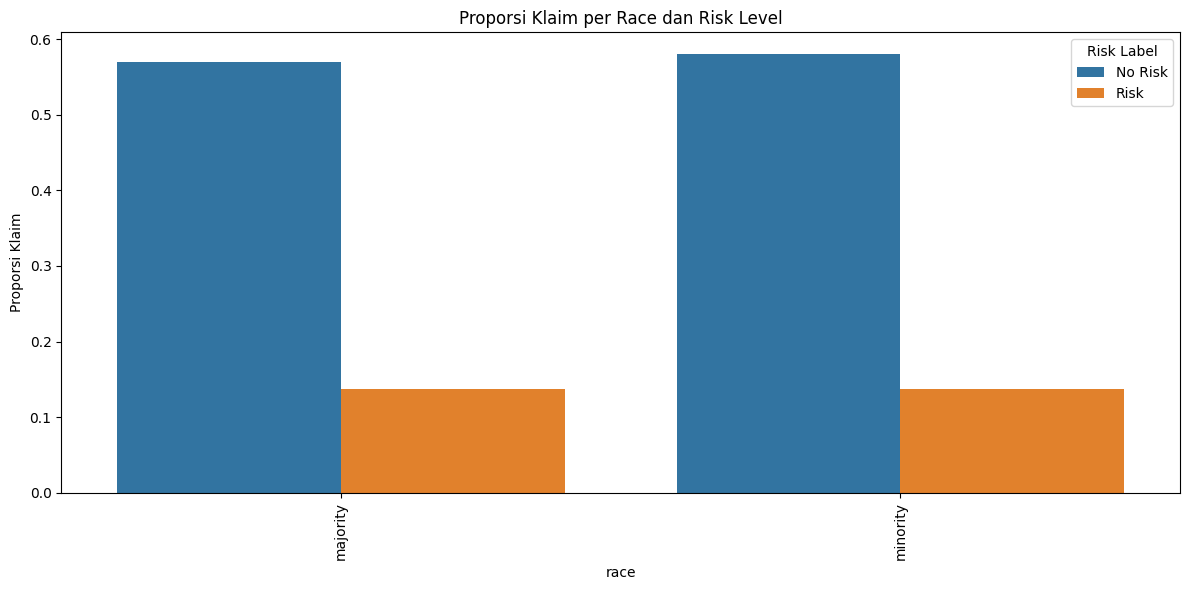

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tambah kolom label risiko
df_customer['risk_label'] = df_customer['risk_behavior_score'].eq(0).replace({True: 'No Risk', False: 'Risk'})

# Crosstab untuk proporsi
ct = pd.crosstab(
    [df_customer['race'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='index'
).reset_index()

# Rename kolom agar mudah dibaca
ct.columns.name = None
ct = ct.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct, x='race', y='Claim', hue='risk_label'
)
plt.title('Proporsi Klaim per Race dan Risk Level')
plt.ylabel('Proporsi Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


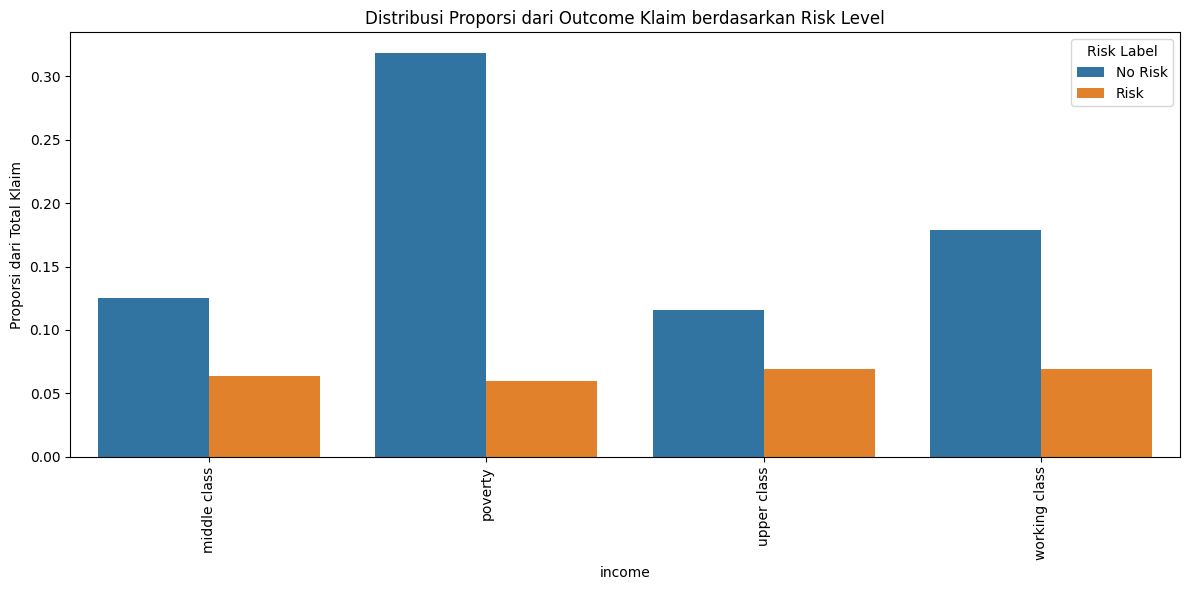

In [130]:
ct_outcome = pd.crosstab(
    [df_customer['income'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='columns'
).reset_index()

# Rename kolom
ct_outcome.columns.name = None
ct_outcome = ct_outcome.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct_outcome,
    x='income',
    y='Claim',
    hue='risk_label'
)
plt.title('Distribusi Proporsi dari Outcome Klaim berdasarkan Risk Level')
plt.ylabel('Proporsi dari Total Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


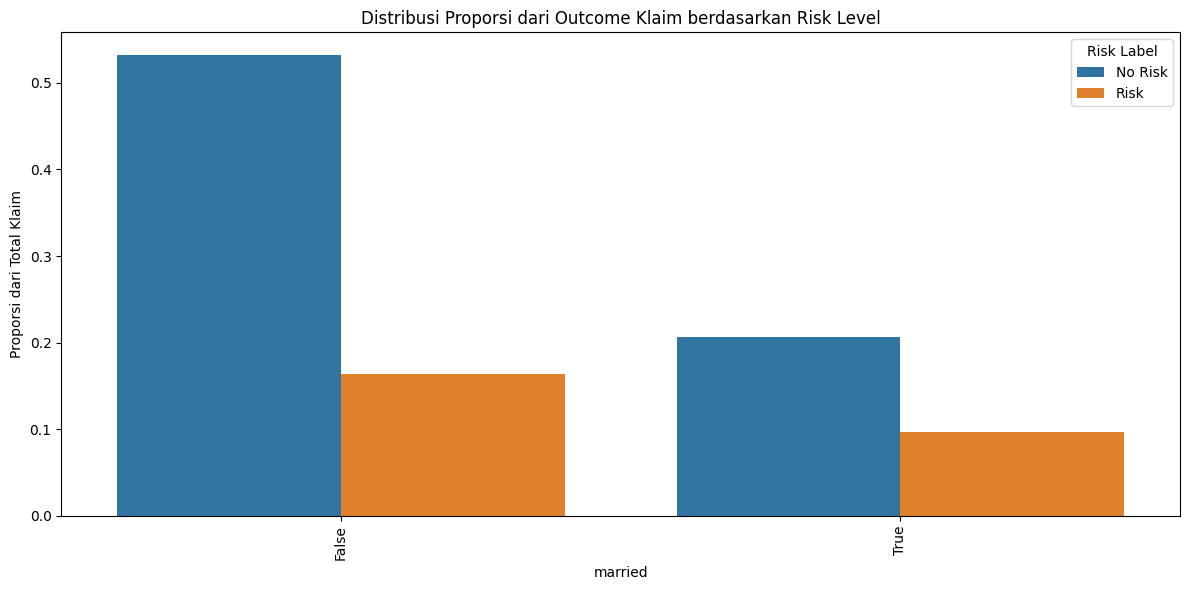

In [140]:
ct_outcome = pd.crosstab(
    [df_customer['married'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='columns'
).reset_index()

# Rename kolom
ct_outcome.columns.name = None
ct_outcome = ct_outcome.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct_outcome,
    x='married',
    y='Claim',
    hue='risk_label'
)
plt.title('Distribusi Proporsi dari Outcome Klaim berdasarkan Risk Level')
plt.ylabel('Proporsi dari Total Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


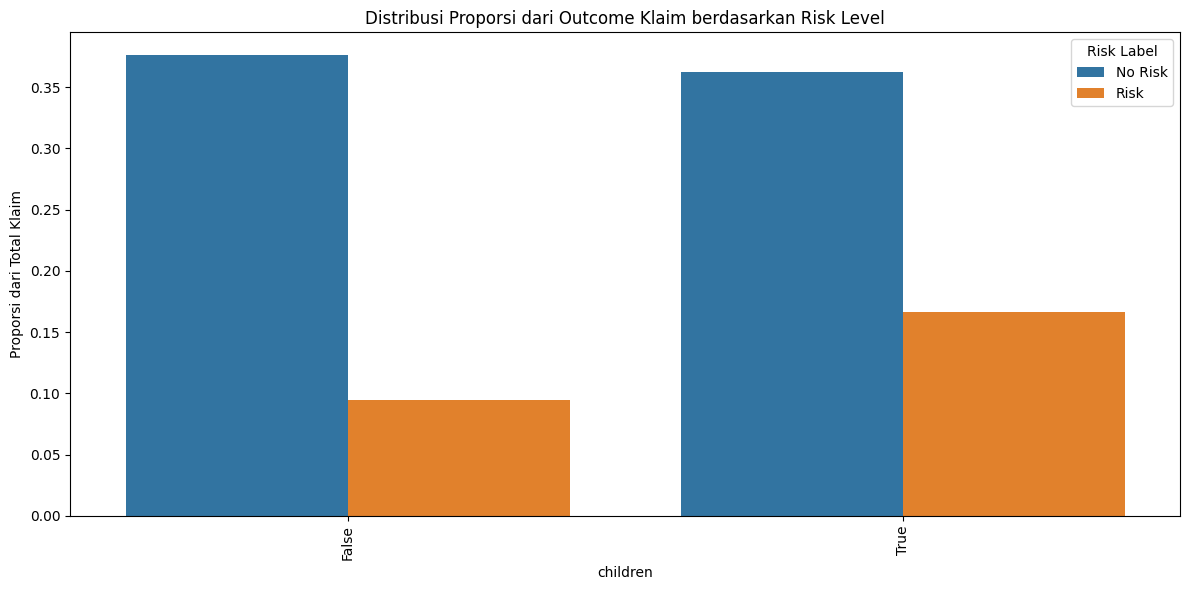

In [141]:
ct_outcome = pd.crosstab(
    [df_customer['children'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='columns'
).reset_index()

# Rename kolom
ct_outcome.columns.name = None
ct_outcome = ct_outcome.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct_outcome,
    x='children',
    y='Claim',
    hue='risk_label'
)
plt.title('Distribusi Proporsi dari Outcome Klaim berdasarkan Risk Level')
plt.ylabel('Proporsi dari Total Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


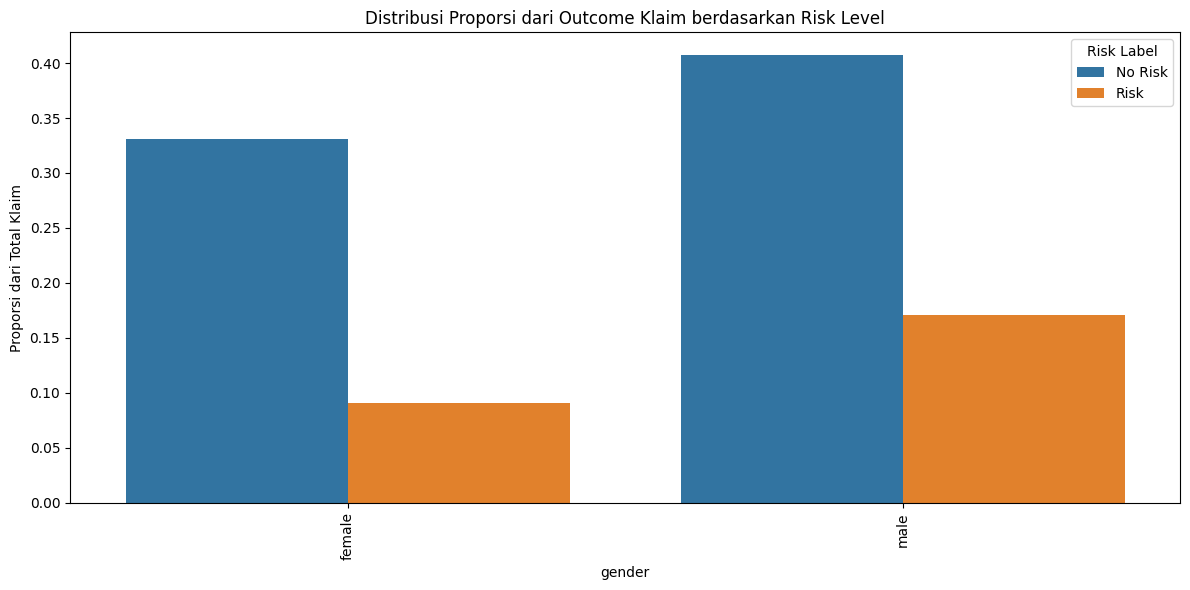

In [142]:
ct_outcome = pd.crosstab(
    [df_customer['gender'], df_customer['risk_label']],
    df_customer['outcome'],
    normalize='columns'
).reset_index()

# Rename kolom
ct_outcome.columns.name = None
ct_outcome = ct_outcome.rename(columns={0: 'No Claim', 1: 'Claim'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ct_outcome,
    x='gender',
    y='Claim',
    hue='risk_label'
)
plt.title('Distribusi Proporsi dari Outcome Klaim berdasarkan Risk Level')
plt.ylabel('Proporsi dari Total Klaim')
plt.xticks(rotation=90)
plt.legend(title='Risk Label')
plt.tight_layout()
plt.show()


### Risk Score Behaviour TIDAK berpengaruh begitu besar terhadap klaim
### Melihat Risk Score Behaviour dari Faktor Lainnya 